In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/WineQT.csv')

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [4]:
df = df.drop(columns=['Id'])

In [5]:
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df = df.drop(columns=['quality'])

In [6]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
542,8.1,0.87,0.00,2.2,0.084,10.0,31.0,0.99656,3.25,0.50,9.8,0
37,8.6,0.38,0.36,3.0,0.081,30.0,119.0,0.99700,3.20,0.56,9.4,0
216,7.5,0.53,0.06,2.6,0.086,20.0,44.0,0.99650,3.38,0.59,10.7,1
224,9.0,0.46,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,1
337,10.4,0.24,0.49,1.8,0.075,6.0,20.0,0.99770,3.18,1.06,11.0,1


# Train test split
### first split dataset into x(input) and y(output)

In [7]:
x=df.drop(columns=['quality_binary'])
y=df['quality_binary']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Scaling by StandardScaler (Standardization)
### NOTE apply sklearn scaler function  on x_train to fit only and
### apply transform in both x_train and x_test,howwever we donot appply scalar function in y(expect in regression with wide range of value)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled =scaler.transform(x_train)
x_test_scaled =scaler.transform(x_test)

In [9]:
x_train_scaled= pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [10]:
np.round(x_train_scaled.describe(),1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.2,-2.3,-1.4,-1.2,-1.6,-1.4,-1.2,-3.5,-3.8,-2.0,-1.9
25%,-0.7,-0.7,-0.9,-0.5,-0.3,-0.9,-0.8,-0.6,-0.7,-0.6,-0.9
50%,-0.2,-0.1,-0.1,-0.2,-0.2,-0.3,-0.2,-0.0,-0.0,-0.2,-0.2
75%,0.4,0.6,0.8,0.1,0.1,0.5,0.5,0.6,0.6,0.4,0.7
max,4.3,5.9,3.8,9.9,11.1,5.1,7.3,3.4,4.6,8.1,3.3


In [11]:
#by standardization scaling
x_train_scaled.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
777,-0.447142,-0.732149,-0.440276,-0.704279,-0.157685,0.810527,0.381092,-0.095500,0.168611,-0.455545,-0.967416
567,0.142680,-0.229213,-0.799481,-0.167885,-0.052223,-0.655479,0.663118,0.061293,-0.943861,-0.756650,-0.967416
889,-0.801035,1.726649,-0.286331,1.211414,-0.263147,0.028657,0.600446,0.907977,1.411962,0.387549,-1.107057
73,-0.329178,-1.514494,-0.029756,-0.397768,-0.727178,0.321858,0.976480,-0.827201,-1.074740,0.809096,0.428988
445,-0.447142,0.609014,-1.363945,-0.091257,-0.199869,0.224125,-0.527659,-0.095500,0.037732,-0.335103,-0.408855


# Effect of Scaling

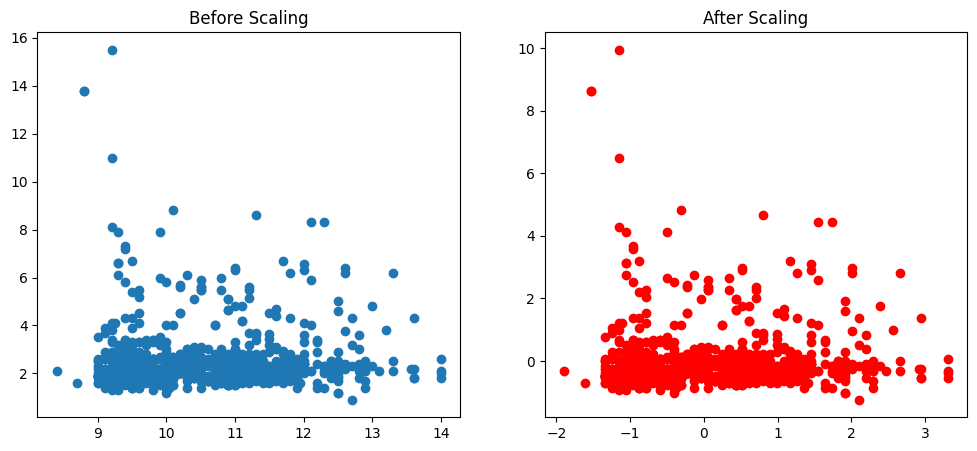

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['alcohol'], x_train['residual sugar'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['alcohol'], x_train_scaled['residual sugar'],color='red')
ax2.set_title("After Scaling")
plt.show()

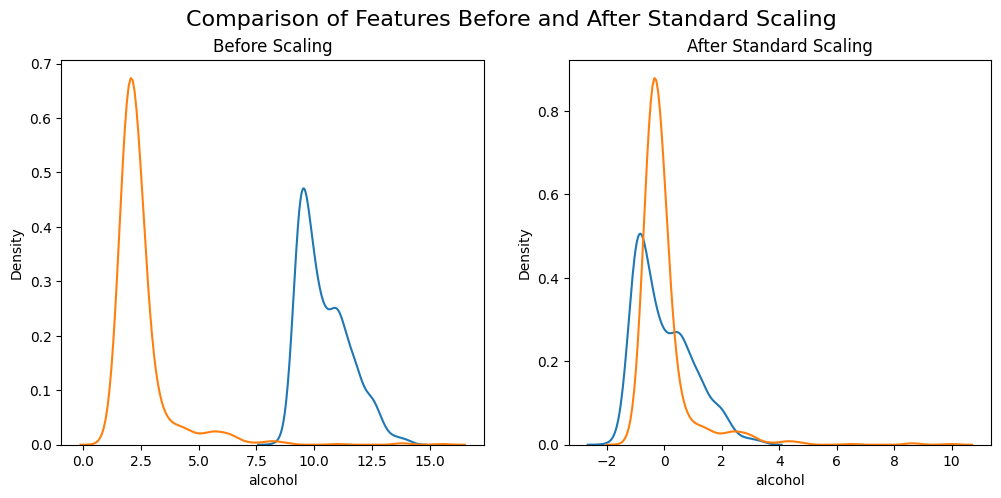

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
fig.suptitle('Comparison of Features Before and After Standard Scaling', fontsize=16)

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)
sns.kdeplot(x_train['residual sugar'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['residual sugar'], ax=ax2)
plt.savefig("scaling_comparison.jpg", dpi=300, bbox_inches='tight')  # You can also use .jpg, .pdf, etc.
plt.show()



# Comparison of Distributions

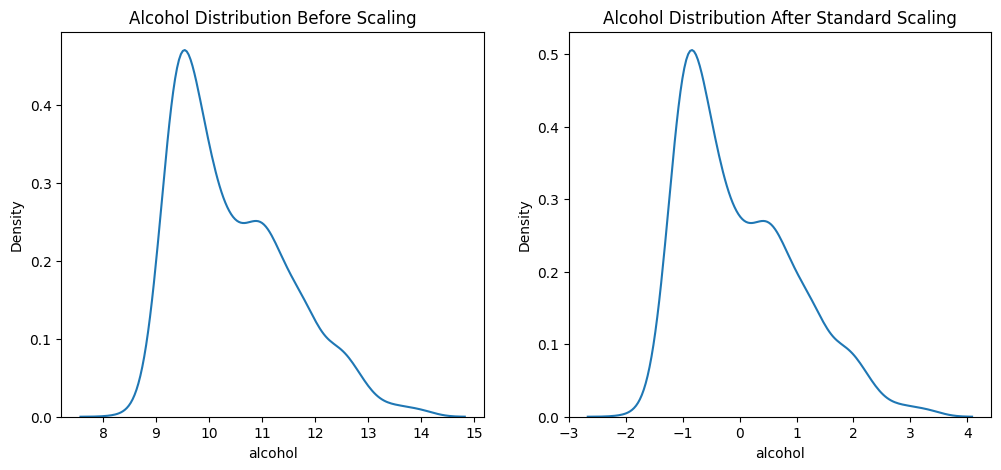

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
plt.show()

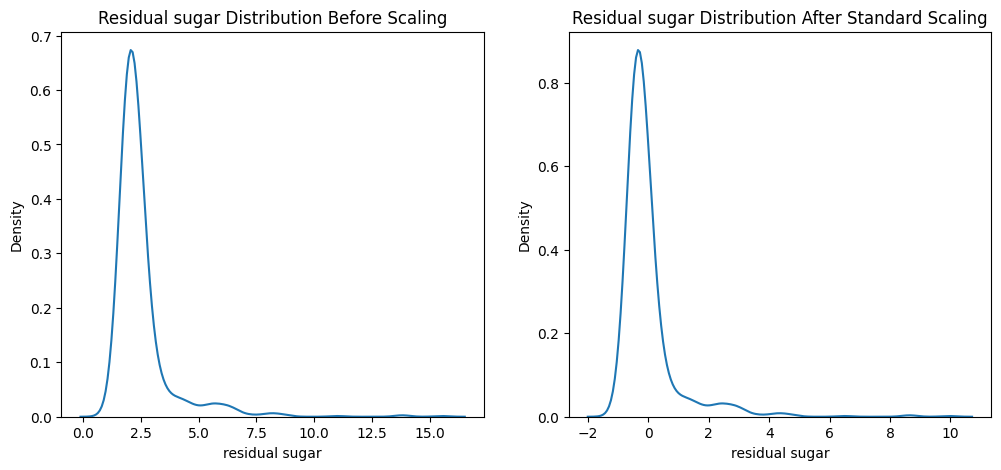

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Residual sugar Distribution Before Scaling')
sns.kdeplot(x_train['residual sugar'], ax=ax1)

# after scaling
ax2.set_title('Residual sugar Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['residual sugar'], ax=ax2)
plt.show()

# Why scaling is important?

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_reg = LogisticRegression()
log_reg_scaled = LogisticRegression()

In [18]:
log_reg.fit(x_train,y_train)

C:\Users\Roshan848\anaconda3\envs\demo1\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
log_reg_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [20]:
y_pred = log_reg.predict(x_test)
y_pred_scaled = log_reg_scaled.predict(x_test_scaled)

# Check accuracy before and after scaling

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.7554585152838428
Scaled 0.7685589519650655


## 🔍 Observation: Logistic Regression Without Scaling

When fitting Logistic Regression without scaling, I received the following warning:

> ConvergenceWarning: lbfgs failed to converge (status=1)

This occurred because some features had very different ranges (e.g., alcohol vs. fixed acidity), making optimization harder.

### 🧪 Fix: StandardScaler

Applying StandardScaler to the dataset removed the warning **without needing to increase max_iter**, and also improved accuracy.

| Model            | Scaling Used     | Warning       | Accuracy |
|------------------|------------------|---------------|----------|
| LogisticRegression | ❌ No           | ⚠️ Yes        | 75.5%    |
| LogisticRegression | ✅ StandardScaler | ✅ No        | 76.8%    |
